 # cadCAD Easy Run for the Minimal Prey & Predator model

In [1]:
import plotly.express as px
import numpy as np
import sys
import seaborn as sns
from tqdm.auto import tqdm

import plotly.io as pio
pio.renderers.default = "png"


 ## Minimal Prey and Predator Model

In [2]:
TIMESTEPS = 100
SAMPLES = 10

initial_conditions = {
    'prey_population': 100,
    'predator_population': 15
}

params = {
    "prey_birth_rate": [1.0],
    "predator_birth_rate": [0.01],
    "predator_death_const": [1.0],
    "prey_death_const": [0.03],
    # Precision of the simulation. Lower is more accurate / slower
    "dt": [0.01, 0.1, 0.05]
}


def p_predator_births(params, step, sL, s):
    dt = params['dt']
    predator_population = s['predator_population']
    prey_population = s['prey_population']
    birth_fraction = params['predator_birth_rate'] + \
        np.random.random() * 0.0002
    births = birth_fraction * prey_population * predator_population * dt
    return {'add_to_predator_population': births}


def p_prey_births(params, step, sL, s):
    dt = params['dt']
    population = s['prey_population']
    birth_fraction = params['prey_birth_rate'] + np.random.random() * 0.1
    births = birth_fraction * population * dt
    return {'add_to_prey_population': births}


def p_predator_deaths(params, step, sL, s):
    dt = params['dt']
    population = s['predator_population']
    death_rate = params['predator_death_const'] + np.random.random() * 0.005
    deaths = death_rate * population * dt
    return {'add_to_predator_population': -1.0 * deaths}


def p_prey_deaths(params, step, sL, s):
    dt = params['dt']
    death_rate = params['prey_death_const'] + np.random.random() * 0.1
    prey_population = s['prey_population']
    predator_population = s['predator_population']
    deaths = death_rate * prey_population * predator_population * dt
    return {'add_to_prey_population': -1.0 * deaths}


def s_prey_population(params, step, sL, s, _input):
    y = 'prey_population'
    x = s['prey_population'] + _input['add_to_prey_population']
    return (y, x)


def s_predator_population(params, step, sL, s, _input):
    y = 'predator_population'
    x = s['predator_population'] + _input['add_to_predator_population']
    return (y, x)


partial_state_update_blocks = [
    {
        'label': 'Lotka-Volterra Equations',
        'policies': {
            'predator_births': p_predator_births,
            'prey_births': p_prey_births,
            'predator_deaths': p_predator_deaths,
            'prey_deaths': p_prey_deaths,
        },
        'variables': {
            'predator_population': s_prey_population,
            'prey_population': s_predator_population
        }
    },
    {
        'label': 'Do Nothing',
        'policies': {
            
        },
        'variables': {
            
        }
    }
]


In [3]:
from cadCAD_tools import easy_run

df = easy_run(initial_conditions,
              params,
              partial_state_update_blocks,
              TIMESTEPS,
              SAMPLES,
              assign_params=True,
              drop_substeps=False)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.5.0
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 5, 30, 2)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 5, 30, 2)


Initializing configurations:   0%|          | 0/30 [00:00<?, ?it/s]

Execution Method: parallelize_simulations
Execution Mode: parallelized


Flattening results:   0%|          | 0/30 [00:00<?, ?it/s]

Total execution time: 0.66s


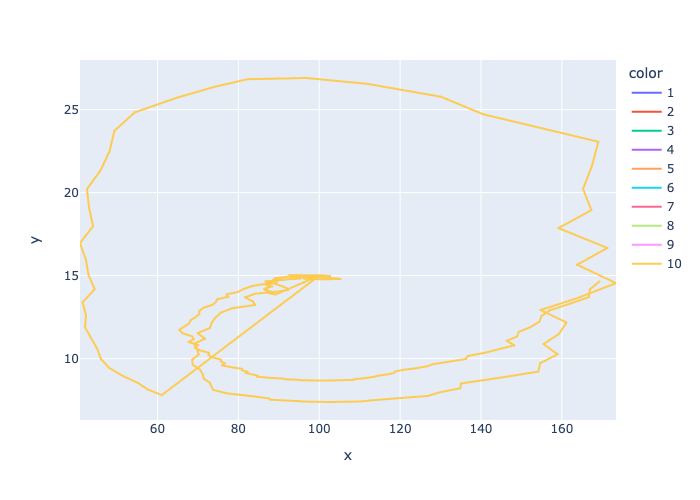

In [4]:
from cadCAD_tools import profile_run

fig = px.line(df.query('dt == 0.1'),
              x=df.prey_population,
              y=df.predator_population,
              color=df.run.astype(str))

fig.show()

In [5]:
df = profile_run(initial_conditions,
              params,
              partial_state_update_blocks,
              20,
              10,
              use_label=True)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.5.0
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 20, 5, 30, 3)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (20, 5, 30, 3)


Initializing configurations:   0%|          | 0/30 [00:00<?, ?it/s]

Execution Method: parallelize_simulations
Execution Mode: parallelized


Flattening results:   0%|          | 0/30 [00:00<?, ?it/s]

Total execution time: 0.54s


In [6]:
df.head(8).substep_label

0               Initial State
1                Time Measure
2    Lotka-Volterra Equations
3                Time Measure
4                  Do Nothing
5                Time Measure
6                Time Measure
7    Lotka-Volterra Equations
Name: substep_label, dtype: object

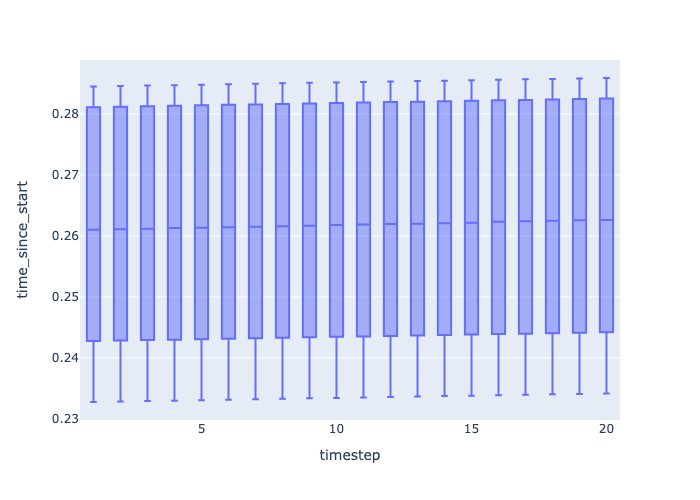

In [7]:
from cadCAD_tools.profiling.visualizations import visualize_elapsed_time_per_ts

visualize_elapsed_time_per_ts(df, relative=False)

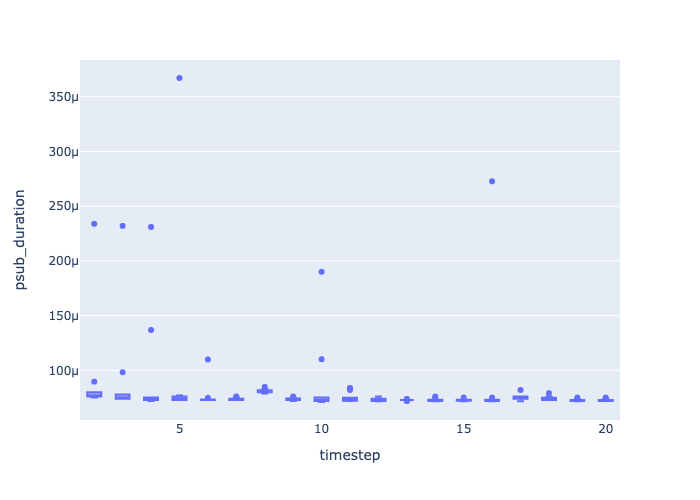

In [8]:
visualize_elapsed_time_per_ts(df, relative=True)

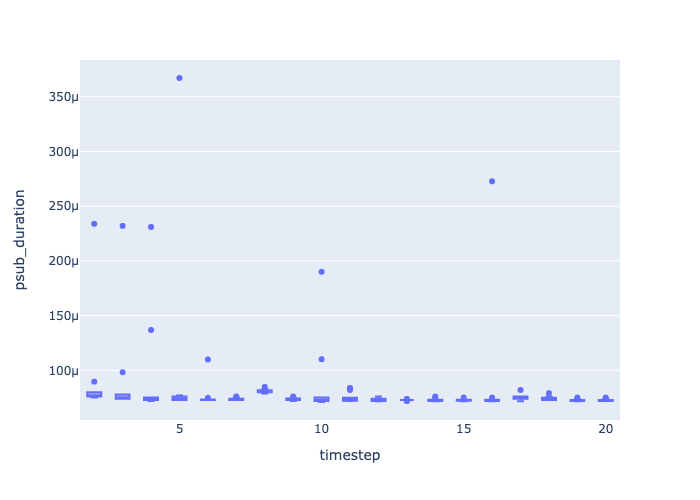

In [9]:
visualize_elapsed_time_per_ts(df, relative=True)

  0%|          | 0/600 [00:00<?, ?it/s]

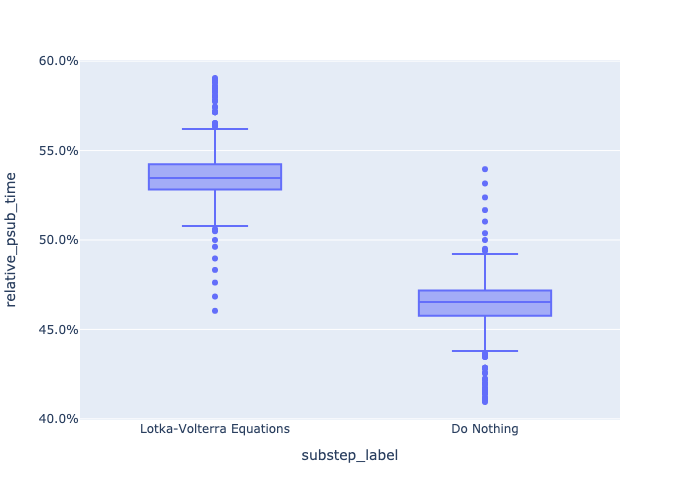

In [10]:
from cadCAD_tools.profiling.visualizations import visualize_substep_impact

visualize_substep_impact(df, relative=True)

  0%|          | 0/600 [00:00<?, ?it/s]

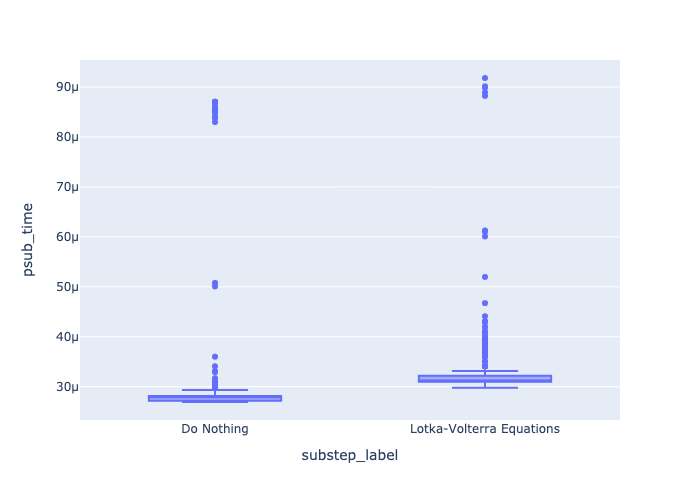

In [11]:
visualize_substep_impact(df, relative=False)